p# Basic Image Analysis
#### Chengliang Tang, Gan Yuan, Diane Lu
#### 2021 Fall

## Image Analysis Tool: OpenCV
OpenCV (Open Source Computer Vision Library) is an open source computer vision and machine learning software library. OpenCV was built to provide a common infrastructure for computer vision applications and to accelerate the use of machine perception in the commercial products.

OpenCV-Python is the Python API for OpenCV, combining the best qualities of the OpenCV C++ API and the Python lnguage. In short, it is a library of Python bindings designed to solve computer vision problems.

## Install OpenCV-Python
To use the OpenCV library in python, we need to install these libraries as a prerequisite:
- Numpy Library (Necessary, because OpenCV uses it in the background).
- OpenCV python
- Matplotlib Library (Package for visualizations in Python)


In [1]:
! pip install opencv-python
! pip install numpy
! pip install matplotlib
import cv2 
import numpy as np
import matplotlib.pyplot as plt

## Import/Export Image
### Read image file
Read an image file as an 3D array of integers ranging from 0 to 255. The third dimension is the slot for the three channels: Red, Green and Blue, or RGB.

In [2]:
## load the image
img = cv2.imread('Olaf.jpg')
## the default color channels are BGR in OpenCV
## we transform it into RGB for visualization purposes
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) 
print('Class:', type(img))
print('Dimensions:', img.shape)
print('Data Type:', img.dtype)
print('Head:', img[:3, :3])
print('Range', np.min(img), np.max(img))

Class: <class 'numpy.ndarray'>
Dimensions: (276, 460, 3)
Data Type: uint8
Head: [[[21 45 91]
  [17 41 87]
  [13 37 83]]

 [[18 42 88]
  [15 39 85]
  [12 36 82]]

 [[27 51 97]
  [23 47 93]
  [18 42 88]]]
Range 0 255


## Display image
We can use Matplotlib to visualize the image in Python notebook.

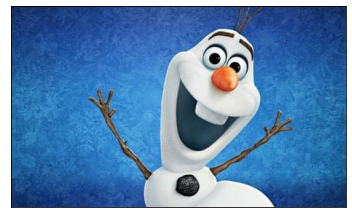

In [3]:
plt.imshow(img)
plt.xticks([]) ## remove the ticks on x-axis
plt.yticks([]) ## remove the ticks on y-axis
plt.show()

## Histogram
The distribution of pixel intensities can be plotted in a histogram.

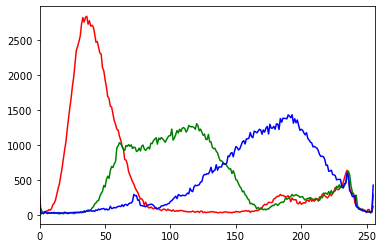

In [4]:
color = ('r', 'g','b')
for i, col in enumerate(color):
    histr = cv2.calcHist([img],[i],None,[256],[0,256])
    plt.plot(histr,color = col)
    plt.xlim([0,256])
plt.show()


## Basic Image Operations
### Resize Image

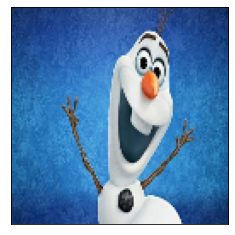

In [5]:
img_small = cv2.resize(img, (128, 128))
plt.imshow(img_small)
plt.xticks([]) 
plt.yticks([]) 
plt.show()

### Display muptiple images

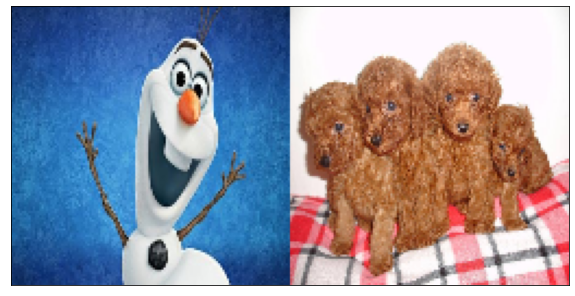

In [6]:
img_dog = cv2.imread('dog.jpg')
img_dog = cv2.cvtColor(img_dog, cv2.COLOR_BGR2RGB)
img_dog = cv2.resize(img_dog, (128, 128)) ## resize the the same size
img_all = np.concatenate([img_small, img_dog], axis=1)
plt.figure(figsize=(10, 20))
plt.imshow(img_all)
plt.xticks([]) 
plt.yticks([]) 
plt.show()

### Rotate image

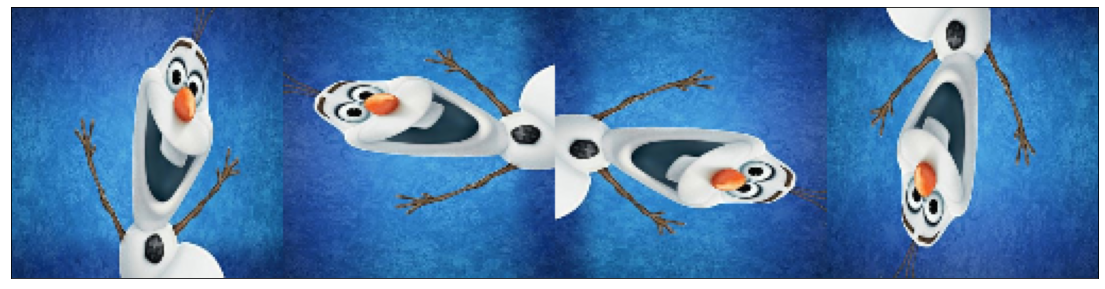

In [7]:
img_rotate_90_clockwise = cv2.rotate(img_small, cv2.ROTATE_90_CLOCKWISE)
img_rotate_90_counterclockwise = cv2.rotate(img_small, cv2.ROTATE_90_COUNTERCLOCKWISE)
img_rotate_180 = cv2.rotate(img_small, cv2.ROTATE_180)
img_all2 = np.concatenate([img_small, 
                           img_rotate_90_counterclockwise,
                           img_rotate_90_clockwise,
                           img_rotate_180], axis=1)
plt.figure(figsize=(20, 5))
plt.imshow(img_all2)
plt.xticks([]) 
plt.yticks([]) 
plt.show()

### Flip image

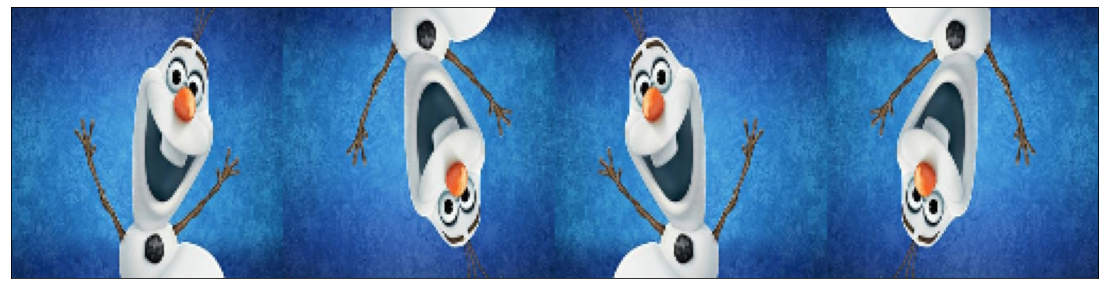

In [8]:
img_flip_ud = cv2.flip(img_small, 0)
img_flip_lr = cv2.flip(img_small, 1)
img_flip_ud_lr = cv2.flip(img_small, -1)
img_all3 = np.concatenate([img_small, 
                           img_flip_ud,
                           img_flip_lr,
                           img_flip_ud_lr], axis=1)
plt.figure(figsize=(20, 5))
plt.imshow(img_all3)
plt.xticks([]) 
plt.yticks([]) 
plt.show()

### Crop image

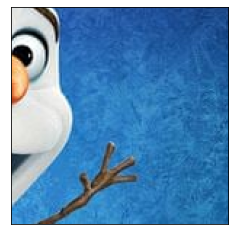

In [9]:
plt.imshow(img[50:200, 300:450])
plt.xticks([]) 
plt.yticks([]) 
plt.show()

### Adjust brightness and contrast

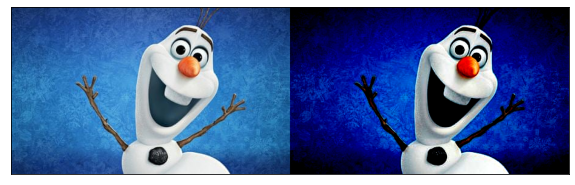

In [10]:
contrast = 127
brightness = -100
# contrast and brightness are integers in the range [-127,127].
img_16 = np.int16(img) # transform image type to int16
img_adjust = img_16 * (contrast/127+1) - contrast + brightness
img_adjust = np.clip(img_adjust, 0, 255)
img_adjust = np.uint8(img_adjust)
img_all4 = np.concatenate([img, img_adjust], axis=1)
plt.figure(figsize=(10, 5))
plt.imshow(img_all4)
plt.xticks([]) 
plt.yticks([]) 
plt.show()

### Translation

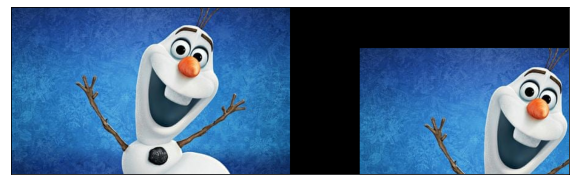

In [11]:
# Store height and width of the image
height, width = img.shape[:2]
  
quarter_height, quarter_width = height / 4, width / 4
  
T = np.float32([[1, 0, quarter_width], [0, 1, quarter_height]]) # define translation matrix
  
# We use warpAffine to transform
# the image using the matrix, T
img_trans = cv2.warpAffine(img, T, (width, height))
img_all5 = np.concatenate([img, img_trans], axis=1)
plt.figure(figsize=(10, 5))
plt.imshow(img_all5)
plt.xticks([]) 
plt.yticks([]) 
plt.show()

### Color management

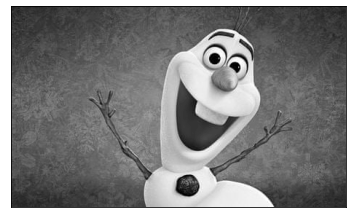

In [12]:
# Transformation to grayscale
img_gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
plt.imshow(img_gray, cmap='gray', vmin=0, vmax=255)
plt.xticks([]) 
plt.yticks([]) 
plt.show()

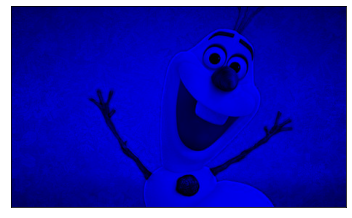

In [13]:
# Transformation to other color channel
img_blue = img.copy()
img_blue[:, :, :2] = 0 # disable other color channels
plt.imshow(img_blue)
plt.xticks([]) 
plt.yticks([]) 
plt.show()

## Filtering
### 1. Linear filtering
A common preprocessing step involves cleaning up the images by removing local artifacts or noise through smoothing. An intuitive approach is to define a window of a selected size around each pixel and average the values within that neighborhood. After applying this procedure to all pixels, the new, smoothed image is obtained. Mathematically, this can be expressed as
$$f'(x,y)=\frac{1}{N} \sum_{s=-a}^{a} \sum_{t=-a}^{a} f(x+s, y+t)$$
where $f'(x,y)$ is the value of the pixel at position $(x,y)$, and aa determines the window size, which is $(2a+1)$ in each direction. $N=(2a+1)^2$ is the number of pixels averaged over, and $f′$ is the new, smoothed image.

More generally, we can replace the moving average by a weighted average, using a weight function ww, which typically has the highest value at the window midpoint (s=t=0) and then decreases towards the edges.
$$ (w∗f)(x,y)=\sum_{s=-\infty}^{+\infty}\sum_{t=-\infty}^{+\infty} w(s,t) f(x+s, y+s)$$

For notational convenience, we let the summations range from $-\infty$ to $\infty$, even if in practice the sums are finite and $w$ has only a finite number of non-zero values. In fact, we can think of the weight function $w$ as another image, and this operation is also called the **convolution** of the images $f$ and $w$, indicated by the the symbol $∗$. Convolution is a *linear operation* in the sense that $w∗(c_1f_1+c_2f_2)=c_1w∗f_1+c_2w∗f_2$ for any two images $f_1$, $f_2$ and numbers $c_1$, $c_2$.

<figure>
<img src="filter.jpeg" alt="convolution" width="800"/>
<figcaption>Source: https://medium.com/nattadet-c/image-filters-41c23f09c600</figcaption>
</figure>


There are 3 types of linear filter
- Box filter
- Gauss filter
- Laplace filter or Mexican hat filter

Box filter and Gauss filter are smooth filters but Laplace filter is a difference filter. The difference of these filter is the weighted number of kernel matrix as the picture.

<figure>
<img src="comparison.jpeg" alt="comparison" width="800"/>
<figcaption>Source: https://medium.com/nattadet-c/image-filters-41c23f09c600</figcaption>
</figure>





#### 1.1. Box filter
You can use a box filter by following this code.

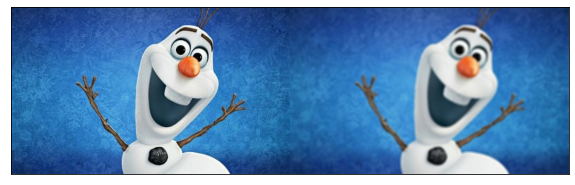

In [14]:
kernel = np.ones((5, 5),np.float32) / 25
img_box = cv2.filter2D(img, -1, kernel)
img_all6 = np.concatenate([img, img_box], axis=1)
plt.figure(figsize=(10, 5))
plt.imshow(img_all6)
plt.xticks([]) 
plt.yticks([]) 
plt.show()

#### 1.2. Gaussian filter
To compute Gauss filter can using this equation or using function from OpenCV as GaussianBlur

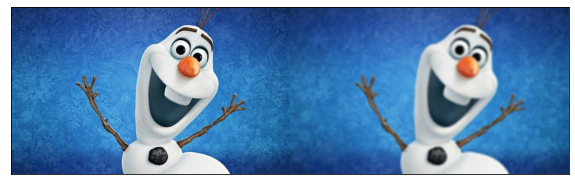

In [15]:
img_gaussian = cv2.GaussianBlur(img, (5, 5), 21)
img_all7 = np.concatenate([img, img_gaussian], axis=1)
plt.figure(figsize=(10, 5))
plt.imshow(img_all7)
plt.xticks([]) 
plt.yticks([]) 
plt.show()



### 2. Non-Linear Filter
Using some non-linear function from the source pixel value. The idea is to replace the target pixel value with its neighbor pixels value from some ordering mechanism or function.

There are many types of Non-Linear Filter but in this article, we will show you one example: median filter.

First, this filter selects the neighbor pixels then sort it from the lowest to highest then pick the middle one to replace at the targeted pixel.

<figure>
<img src="median.png" alt="median" width="600"/>
<figcaption>Source: https://medium.com/nattadet-c/image-filters-41c23f09c600</figcaption>
</figure>


In OpenCV has the function for the median filter you picture which is `medianBlur` function. This is an example of using it.



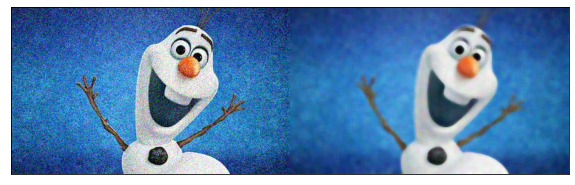

In [17]:
# we first generate noisy image by adding Gaussian noise.
img_noisy = np.random.normal(loc=0.0, scale=30.0, size=img.shape) + img 
img_noisy = np.clip(img_noisy, 0, 255)
img_noisy = np.uint8(img_noisy)
img_median = cv2.medianBlur(img_noisy, 9)
img_all9 = np.concatenate([img_noisy, img_median], axis=1)
plt.figure(figsize=(10, 5))
plt.imshow(img_all9)
plt.xticks([]) 
plt.yticks([]) 
plt.show()

## Image Thresholding
### Simple Thresholding
Here, the matter is straight-forward. For every pixel, the same threshold value is applied. If the pixel value is smaller than the threshold, it is set to 0, otherwise it is set to a maximum value. The function cv.threshold is used to apply the thresholding. The first argument is the source image, which should be a grayscale image. The second argument is the threshold value which is used to classify the pixel values. The third argument is the maximum value which is assigned to pixel values exceeding the threshold. OpenCV provides different types of thresholding which is given by the fourth parameter of the function. Basic thresholding as described above is done by using the type `cv.THRESH_BINARY`. All simple thresholding types are:

- `cv.THRESH_BINARY`
- `cv.THRESH_BINARY_INV`
- `cv.THRESH_TRUNC`
- `cv.THRESH_TOZERO`
- `cv.THRESH_TOZERO_INV`
See the documentation of the types for the differences.

The method returns two outputs. The first is the threshold that was used and the second output is the thresholded image.

This code compares the different simple thresholding types:

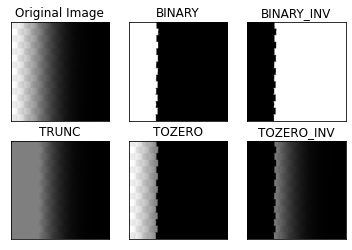

In [18]:
img = cv2.imread('gradient.jpeg',0)
ret, thresh1 = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)
ret, thresh2 = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY_INV)
ret, thresh3 = cv2.threshold(img, 127, 255, cv2.THRESH_TRUNC)
ret, thresh4 = cv2.threshold(img, 127, 255, cv2.THRESH_TOZERO)
ret, thresh5 = cv2.threshold(img, 127, 255, cv2.THRESH_TOZERO_INV)
titles = ['Original Image', 'BINARY', 'BINARY_INV', 'TRUNC', 'TOZERO', 'TOZERO_INV']
images = [img, thresh1, thresh2, thresh3, thresh4, thresh5]
for i in range(6):
    plt.subplot(2,3,i+1),plt.imshow(images[i],'gray',vmin=0,vmax=255)
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

### Adaptive Thresholding
In the previous section, we used one global value as a threshold. But this might not be good in all cases, e.g. if an image has different lighting conditions in different areas. In that case, adaptive thresholding can help. Here, the algorithm determines the threshold for a pixel based on a small region around it. So we get different thresholds for different regions of the same image which gives better results for images with varying illumination.

In addition to the parameters described above, the method cv.adaptiveThreshold takes three input parameters:

The adaptiveMethod decides how the threshold value is calculated:

- `cv.ADAPTIVE_THRESH_MEAN_C`: The threshold value is the mean of the neighbourhood area minus the constant C.
- `cv.ADAPTIVE_THRESH_GAUSSIAN_C`: The threshold value is a gaussian-weighted sum of the neighbourhood values minus the constant C.
The blockSize determines the size of the neighbourhood area and C is a constant that is subtracted from the mean or weighted sum of the neighbourhood pixels.

The code below compares global thresholding and adaptive thresholding for an image with varying illumination:



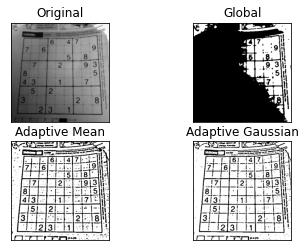

In [19]:
img = cv2.imread('sudoku.jpeg',0)
img = cv2.medianBlur(img, 5)
ret,th1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY)
th2 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_MEAN_C,\
            cv2.THRESH_BINARY,11,2)
th3 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,\
            cv2.THRESH_BINARY,11,2)
titles = ['Original', 'Global',
            'Adaptive Mean', 'Adaptive Gaussian']
images = [img, th1, th2, th3]
for i in range(4):
    plt.subplot(2,2,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

## References
1. OpenCV Tutorial: https://docs.opencv.org/4.5.1/d6/d00/tutorial_py_root.html
2. Tutorial on Image Filters: https://medium.com/nattadet-c/image-filters-41c23f09c600
3. Matplotlib Tutorial: https://matplotlib.org/stable/tutorials/index.html